# EXPLORATORY DATA ANALYSIS AND T-SNE VISUALIZATION ON TITANIC DATASET  

## INTRODUCTION  
In this tutorial, we will be using the Titanic dataset. The main goal of the kernel is the EDA as mentionned previously. This kernel will be followe by another one which will cover machine learning aspect. 
So, feel free to **upvote** if you like the content or drop a comment for any suggestion.
This kernel is going to cover some aspect of exploratory data analysis and visualuzation technic. After completing this kernel, you will be able to understand the following aspect and the interpretation behind all of them: 

## I- PROBLEM UNDERSTANDING

## II- EXPLORATORY DATA ANALYSIS  

        II-1 SOME STATISTICS ON THE DATASET  
        II-2 UNIVARIATE ANALYSIS  

        II-2-1 Univariate analysis for categorical - non continuous numerical features.  

        II-2-2 Univariate analysis (PDF,CDF, boxplot, violin plot) for numerical-continuous features.  

## III- VECTORIZATION OF OUR FEATURES  
        III-0 Data cleaning before vectorization  

        III-1 Apply standardization technics to numerical features.  

        III-2 Apply binarization/one-hot encoding technics to categorical features.  

        III-0 Data cleaning before vectorization  
            III-0-1 Data cleaning on Cabin feature  
            III-0-2 Data cleaning on Home.dest feature  
            III-0-3 Data cleaning on Embarked feature  
            III-0-4 Data cleaning on Sibs feature  
            III-0-5 Data cleaning on Parch feature  

        III-1 Apply standardization technics to numerical features  
            III-1-1 Standardization: Age feature  
            III-1-2 Standardization: Fare feature  

        III-2 Apply binarization/one-hot encoding technics to categorical features  
            III-2-1 Binarization: Sex feature  
            III-2-2 Binarization: Cabin feature  
            III-2-3 Binarization: Home dest feature  
            III-2-4 Binarization: Embarked feature  
            III-2-5 Binarization: P-class feature  
            III-2-6 Binarization: sibsp feature  
            III-2-7 Binarization: parch feature  
            III-2-8 Binarization: boat feature  
            
## IV- VISUALIZATION USING T-SNE  
        IV-1 T-Distributed Stochastic Neighbourhood Embedding (t-SNE)  

## I- PROBLEM UNDERSTANDING  
The titanic dataset consist of demographic and travelling information for passengers. And the goal of this EDA is to determine which features are much more relevant for further prediction. So in the prediction part that will be done in the machine learning part will be to predict the survival of these passengers. 
Below are the attributes/features used in the dataset.  
<ul>**Dataset attributes**
    <li>pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
    <li>survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target</li>
    <li>name: Title and family names of passengers</li>
    <li>age: Age </li>
    <li>sibsp: Number of siblings/spouses aboard</li>
    <li>parch: Number of parents/children aboard</li>
    <li>ticket: Ticket number</li>
    <li>fare: Passenger fare (British Pound)</li>
    <li>cabin: Doesthe location of the cabin influence chances of survival?</li>
    <li>embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
    <li>boat: Lifeboat, many missing values</li>
    <li>body: Body Identification Number</li>
    <li>home.dest: Home/destination</li>
</ul>

**IMPORT USEFUL LIBRARIES**

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

## II- EXPLORATORY DATA ANALYSIS 
**II-1 SOME STATISTICS ON THE DATASET**  
We are going to perform some statistical studies on the dataset in order to understand more about: 
<ol>
    <li>The number of passengers - columns</li>
    <li>The meaning of the values of the 'Survived column'</li>
    <li>The number of survivors - unsurvivors</li>
    <li>Some advanced statistical analysis</li>
    <li>First observation</li>
</ol>  


In [ ]:
titanic = pd.read_csv('../input/titanic3.csv')

# how many features and data-points ?
print('Number of data points: ', titanic.shape[0])
print('Number of data features: ', titanic.shape[1])

In [ ]:
# The columns/features of the dataset
print('Columns: ', list(titanic.columns))
titanic.head(2) # Print the 2 first rows

In [ ]:
# Number of classes in the survived column
classes = titanic.survived.unique()
print('Survivors represented by: ', classes[0])
print('Usurvivors represented by: ', classes[1])

In [ ]:
# Passengers per class
number_surv_unsurv = titanic.survived.value_counts()
print('Number of survivors: ', number_surv_unsurv[0])
print('Number of unsurvivors: ', number_surv_unsurv[1])

# Code for the graphic
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Array for labels
recipe = ["Number of survivors", "Number of unsurvivors"]

# Array for value corresponding to labels
data = [number_surv_unsurv[0], number_surv_unsurv[1]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


ax.set_title("Number of passengers who survived - did not survive")

plt.show()

In [ ]:
# Some advanced statictical information about the dataset  
# Table-1: Statistical summary
titanic.describe()

**First observation:**  
After this first part, we noticed that our dataset contains information about 1309 passengers, and those information were based on 14 parameters. the survived column is the one telling us if a passenger survived with the value of 1 or did not survive with the value of 2. And 70% of the passengers have no parents-children aboard (Table-1, column **parch** row **70%**).

<ol>**II-2 UNIVARIATE ANALYSIS**  
We are going to perform some univariate analysis technics and do an observation for each part. The analyis technics are: 
    <li>Univariate analysis for categorical - non continuous numerical features</li>
    <li>Univariate analysis (PDF,CDF, boxplot, violin plot) for numerical-continuous features</li>
</ol>  


### II-2-1 Univariate analysis for categorical - non continuous numerical features.  
Below are the features we are going to analyse are
<ul>
    <li>P-class: non-continuous numerical feature</li>
    <li>Sex: categorical feature</li>
    <li>Cabin: categorical feature</li>
    <li>Embarked: categorical feature</li>
    <li>Home.dest: categorical feature</li>
</ul>

**Univariate Analysis: P-Class** 

In [ ]:
def stack_plot(data, xtick, col2='survived', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Number of total passengers')
    plt.title('Number survived passengers')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'survived'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='survived', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(titanic.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(titanic.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(titanic.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

In [ ]:
# Graphic N°1
univariate_barplots(titanic, 'pclass', 'survived', False)

**Univariate Analysis: Sex** 

In [ ]:
# Graphic N°2
univariate_barplots(titanic, 'sex', 'survived', False)

**Univariate Analysis: Cabin**   
For better visualization we will be showing the top 15 Cabin that had the most survivors. Beyond this value, it becomes difficult to read. 

In [ ]:
# Graphic N°3
univariate_barplots(titanic, 'cabin', 'survived', top=15)

**Univariate Analysis: Home dest**   
For better visualization we will be showing the top 10 home destination that had the most survivors. Beyond this value, it becomes difficult to read.

In [ ]:
# Graphic N°4
univariate_barplots(titanic, 'home.dest', 'survived', top=10)

**Univariate Analysis: Embarked**   

In [ ]:
# Graphic N°5
univariate_barplots(titanic, 'embarked', 'survived')

**Univariate Analysis: Sibsp**   

In [ ]:
# Graphic N°6
univariate_barplots(titanic, 'sibsp', 'survived')

Parch

In [ ]:
# Graphic N°6
univariate_barplots(titanic, 'parch', 'survived')

**Observation of barplots:** 
Based on the above visualization, we can notice that : 
<ul>
    <li>More passengers in the First class survived to the drama (Graphic N°1)</li>
    <li>The majority of survivors where women (Graphic N°2)</li>
    <li>The majority of survivors where women (Graphic N°2)</li>
    <li>The majority of survivors where thos who embarked at Cherbourg (Graphic N°5)</li>
    <li>All the passengers having more than 4 ciblings/spouses did not survive (Graphic N°6 & 6)</li>
</ul>

### II-2-2 Univariate analysis (PDF,CDF, boxplot, violin plot) for numerical-continuous features.  
Here are the features we are going to analyse the following features  
<ul>
    <li>Age</li>     
</ul>  

**Probability Density Function**  
The goal of this analysis technic is to determine the probability to be in a certain range of the considered feature, age in our case.  

In [ ]:
# PDF of passengers' age  : Graphic N°7
sns.FacetGrid(titanic, hue='survived', height=5) \
   .map(sns.distplot, 'age') \
   .add_legend();
plt.title('Probability Density Function (PDF) of Passengers\'s age')
plt.show()

**Cumulative Density Function**  
This analysis can give us more precise information about the probability for a feature to be less or equal to a specific value taken by that feature (on the x-axis).

In [ ]:
# CDF of passengers' age  : Graphic N°8

'''
In our dataset, we have some NaN values, it means missing values. To do so, we are going to 
replace the missing value by the median value. 
'''

titanic_survived = titanic.loc[titanic['survived'] == 1] 
titanic_unsurvived = titanic.loc[titanic['survived'] == 0] 

# Replace missing values by median values.
titanic_survived['age'].fillna((titanic_survived['age'].median()), inplace=True)
titanic_unsurvived['age'].fillna((titanic_unsurvived['age'].median()), inplace=True)

In [ ]:
# Age for survived patients: 
# refers to understand bins counts egdes, refer to : https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html 

counts, bin_edges = np.histogram(titanic_survived['age'], bins=10, density = True) 
pdf = counts/(sum(counts)) 

cdf = np.cumsum(pdf) 
#plt.plot(bin_edges[1:],pdf) 
plt.plot(bin_edges[1:], cdf)
 
# Age for unsurvived patients 
counts, bin_edges = np.histogram(titanic_unsurvived['age'], bins=10, density = True) 
pdf = counts/(sum(counts)) 

cdf = np.cumsum(pdf) 
#plt.plot(bin_edges[1:],pdf) 
plt.plot(bin_edges[1:], cdf) 
plt.legend(['cdf of survivors', 'cdf of unsurvivors']) #fig5

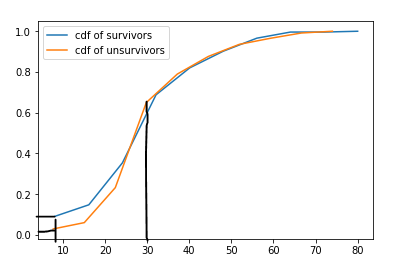  

**Analysis:** The age of almost 65% of unsurvivors were less or equal to 30. 

**Box-plot**  
This analysis give more statistical informations about the features we are analysing. It also show the corrupted values (if they exist) related to the feature. Regarding the statistical informations about quantiles (Q1, Q2, Q3), where  

Q1 ==> 25th percentile  
Q2 ==> median value/50th percentile  
Q3 ==> 75th percentile  


In [ ]:
sns.boxplot(x='survived', y='age', data=titanic)

**Violin-plot analysis**  
This technic combines PDFs and box-plots


In [ ]:
sns.violinplot(x='survived',y='age', data=titanic, size=8) 
plt.show()


# III- VECTORIZATION OF OUR FEATURES
For further machine learning technic application, and good visualization, we are going to transform our features into vectors. To do so will be working following the below process:  
<ol>**III-0 Data cleaning before vectorization**  
    Let's have a look at some of our categorical features in order to know if cleaning will be helpfull. 
</ol>

<ol>**III-1 Apply standardization technics to numerical features**.  
    In our case, this technic will be applied to 
    <li>Age: numerical feature</li>
    <li>Fare: numerical feature</li>
</ol>

<ol>**III-2 Apply binarization/one-hot encoding technics to categorical features**.   
    In our case, this technic will be applied to 
    <li>Sex: categorical feature</li>
    <li>Cabin: categorical feature </li>
    <li>Home.dest: categorical feature</li>
    <li>Embarked: categorical feature</li>
    <li>P-class: categorical feature</li>
    <li>Sibsp: categorical feature</li>
    <li>Parch: categorical feature</li>
    <li>Boat: categorical feature</li>
</ol>

## III-0 Data cleaning before vectorization  
Let's have a look at some of our categorical features in order to know if cleaning will be helpfull.  

**III-0-1 Data cleaning on Cabin feature**

In [ ]:
# Check if any cleaning is needed
print(set((titanic.cabin.values)))

**observation**: As we can see in the values taken by this feature, some are separated with spaces like: 
<ul>
    <li>C23 C25 C27</li>
    <li>B52 B54 B56</li>
    <li>F E46</li>
    <li>etcetera, etcetera ...</li>
    So we are going to replace all the blancks by underscore in order to create a "sigle string".  
    For example: 
    <li>C23 C25 C27 ===> C23_C25_C27</li> 
    <li>B52 B54 B56 ===> B52_B54_B56</li>
    <li>F E46 ===> F_E46</li>
</ul>

In [ ]:
titanic.cabin=titanic.cabin.replace(' ', '_', regex=True)

print(set((titanic.cabin.values)))

**Observation:** We can notice that the application performed very well. 

**III-0-2 Data cleaning on Home.dest feature**

In [ ]:
# Check if any cleaning is needed 
# Here, we are just checking on the 20 first values to avoid printing all the values.
# print(set((titanic['home.dest'].values))) if you want to see all the values
print(set((titanic['home.dest'].values[0:20])))

**Observation**: We will be doing the same processing like previously. But in this case, we have more special characters like: 
<ul>
    <li>Backslash: /</li>
    <li>Coma: ,</li>  
    And we will replace all of them by underscore. 
</ul>

In [ ]:
# Now apply the function to the 'Home.dest column'
# Without .astype(str), we are going to have the error below : 
# AttributeError: 'float' object has no attribute 'replace'

home_destinations = list(titanic['home.dest'].astype(str).values)

home_list = []

for dest in home_destinations:
    dest = dest.replace(',','_')
    dest = dest.replace('[ ]+','')
    dest = dest.replace('/','_')
    home_list.append(dest)

In [ ]:
titanic['home.dest'] = home_list
print(set((titanic['home.dest'].values[0:20])))
titanic.head(2)

**Observation**: We can notice that the application performed very well. 

**III-0-3 Data cleaning on Embarked feature**

In [ ]:
# Check if any cleaning is needed 
print(set((titanic['embarked']))) # Nothing to do. 

**III-0-4 Data cleaning on Sibs feature**

In [ ]:
print(set((titanic['sibsp']))) # Nothing to do. 

**III-0-5 Data cleaning on Parch feature**

In [ ]:
print(set((titanic['parch']))) # Nothing to do. 

## III-1 Apply standardization technics to numerical features   
We are going to use the **sklearn StandardScaler** module to standardize our numerical features.  

In [ ]:
from sklearn.preprocessing import StandardScaler

**III-1-1 Standardization:** Age feature

In [ ]:
age_scalar = StandardScaler()
age_scalar.fit(titanic['age'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {age_scalar.mean_[0]}, Standard deviation : {np.sqrt(age_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
age_standardized = age_scalar.transform(titanic['age'].values.reshape(-1, 1))

In [ ]:
# Look at the standardized age feature.
age_standardized

**III-1-2 Standardization:** Fare feature

In [ ]:
fare_scalar = StandardScaler()
fare_scalar.fit(titanic['fare'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {fare_scalar.mean_[0]}, Standard deviation : {np.sqrt(fare_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
fare_standardized = fare_scalar.transform(titanic['age'].values.reshape(-1, 1))

In [ ]:
# Look at the standardized fare feature.
fare_standardized

## III-2 Apply binarization/one-hot encoding technics to categorical features  
We are to use sklearn CountVectorizer module.  

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# As the process will be the same all the time, we will create a function
def create_one_hot_vect(data, column):
    non_string_columns = ['sibsp', 'cabin', 'embarked', 'pclass', 'parch', 'boat']
    
    if(column in non_string_columns):
        data[column] =data[column].apply(lambda x: np.str_(x))
        
    col = set(data[column].values)

    vectorizer = CountVectorizer(vocabulary=list(col), lowercase=False, binary=True)
    vectorizer.fit(data[column].values)
    print(vectorizer.get_feature_names())

    col_one_hot = vectorizer.transform(data[column].values)
    #print("Shape of matrix after one hot encodig ",col_one_hot.shape)
    return col_one_hot

**III-2-1 Binarization:** Sex feature  

In [ ]:
sex_one_hot = create_one_hot_vect(titanic, 'sex')
print("Shape of matrix after one hot encodig ",sex_one_hot.shape)

# Look at the binarized sex feature.
sex_one_hot

**III-2-2 Binarization:** Cabin feature  

In [ ]:
cabin_one_hot = create_one_hot_vect(titanic, 'cabin')
print("Shape of matrix after one hot encodig ",cabin_one_hot.shape)

# Look at the binarized cabin feature.
cabin_one_hot

**III-2-3 Binarization:** Home dest feature  

In [ ]:
home_dest_one_hot = create_one_hot_vect(titanic, 'home.dest')
print("Shape of matrix after one hot encodig ",home_dest_one_hot.shape)

# Look at the binarized cabin feature.
#home_dest_one_hot

**III-2-4 Binarization:** Embarked feature  

In [ ]:
embarked_one_hot = create_one_hot_vect(titanic, 'embarked')
print("Shape of matrix after one hot encodig ",embarked_one_hot.shape)

# Look at the binarized cabin feature.
embarked_one_hot

**III-2-5 Binarization:** P-class feature  

In [ ]:
pclass_one_hot = create_one_hot_vect(titanic, 'pclass')
print("Shape of matrix after one hot encodig ",pclass_one_hot.shape)

# Look at the binarized cabin feature.
pclass_one_hot

**III-2-6 Binarization:** sibsp feature  

In [ ]:
sibsp_one_hot = create_one_hot_vect(titanic, 'sibsp')
print("Shape of matrix after one hot encodig ",sibsp_one_hot.shape)

# Look at the binarized cabin feature.
sibsp_one_hot

**III-2-7 Binarization:** parch feature  

In [ ]:
parch_one_hot = create_one_hot_vect(titanic, 'parch')
print("Shape of matrix after one hot encodig ",parch_one_hot.shape)

# Look at the binarized cabin feature.
parch_one_hot

**III-2-8 Binarization:** boat feature  

In [ ]:
boat_one_hot = create_one_hot_vect(titanic, 'boat')
print("Shape of matrix after one hot encodig ",boat_one_hot.shape)

# Look at the binarized cabin feature.
boat_one_hot

# IV- VISUALIZATION USING T-SNE 
When we look at the number of parameters/features we have, we notice that we have more than 5 features. So to visualize such data (having such number of feature), it is better to use technics of dimentinality reduction. In our case, we are going to use the following one:  
<ol>**IV-1 T-Distributed Stochastic Neighbourhood Embedding (t-SNE)**</ol>   

Before performin the T-SNE technic we will build the data matrix using the vectors created in the above cells.  

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from sklearn.manifold import TSNE

In [ ]:
# Create the data matrix
titanic_data_matrix = hstack((age_standardized, fare_standardized,
                             sex_one_hot, cabin_one_hot, home_dest_one_hot,
                             embarked_one_hot, pclass_one_hot,sibsp_one_hot,
                             parch_one_hot, boat_one_hot))

print(titanic_data_matrix.shape)

In [ ]:
titanic_data_matrix

In [ ]:
# Convert the matrix into dense matrix
X = titanic_data_matrix.toarray()
y = titanic['survived']

tsne = TSNE(n_components=2, random_state=0, perplexity=50)

# Without the expression "np.nan_to_num(X)" we get the below error: 
# ValueError: Input contains NaN, infinity or a value too large for dtype('float32')

X_embedding = tsne.fit_transform(np.nan_to_num(X))

for_tsne = np.vstack((X_embedding.T, y)).T

for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.xlabel('Dimension_x')
plt.ylabel('Dimension_y')
plt.title('TSNE: TFIDF | perplexity = 50, learning_rate=200 (Default value)')
plt.show()


**Observation:** With the T-SNE technic, we can see that most survived passengers are grouped to the top-left (green) which contains a few overlap. Then, most of the other survivors can be seen to the right, very well regrouped. So T-SNE is a very good visualization technic which help us having better visualization of our passengers.